In [104]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold
from sklearn.cross_validation import KFold, cross_val_score,train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
mpl.rc('xtick', labelsize=30) 
mpl.rc('ytick', labelsize=30)
import itertools
%matplotlib inline
from sklearn.externals import joblib

In [105]:
# 读取训练集
train = pd.read_pickle("/home/zhh/文档/阿里巴巴/data/6.合表/训练集总表v3.pickle")
train = train.drop(['上中下旬'],axis=1)
train["一次性医用材料申报金额"]=train.fillna(train["一次性医用材料申报金额"].median())
train.columns

Index(['个人编码', '药品费发生金额', '贵重药品发生金额', '中成药费发生金额', '中草药费发生金额', '药品费自费金额',
       '药品费申报金额', '检查费发生金额', '检查费申报金额', '治疗费发生金额', '治疗费申报金额', '医用材料发生金额',
       '其它发生金额', '一次性医用材料申报金额', '起付标准以上自负比例金额', '基本医疗保险统筹基金支付金额', '可用账户报销金额',
       '基本医疗保险个人账户支付金额', '非账户支付金额', '本次审批金额', '标签', '特殊金额', '三目空值', '普通门诊',
       '糖尿病门诊', '其他门诊', '乙肝', '肝素钙', '脑心通胶囊', '通心络胶囊', '其他胶囊', '三目其他',
       '三目项目总价', '三目统计项目总计和', '挂号次数和', '空值次数和', '肾病次数和', '门特次数和', '心血管病次数和',
       '脑血管病次数和', '癌症次数和', '肺病次数和', '糖尿病次数和', '神经病次数和', '精神病次数和', '高血压次数和',
       '病变次数和', '偏瘫次数和', '心脏病次数和', '肺心病次数和', '肾性次数和', '合并次数和', '肾病1次数和',
       '其他次数和', '出院诊断病种名称个数', '交易间隔平均值', '交易间隔最大值', '交易次数', '医院个数',
       '一周星期几_Friday', '一周星期几_Monday', '一周星期几_Saturday', '一周星期几_Sunday',
       '一周星期几_Thursday', '一周星期几_Tuesday', '一周星期几_Wednesday'],
      dtype='object')

In [106]:
train.head()

,个人编码,药品费发生金额,贵重药品发生金额,中成药费发生金额,中草药费发生金额,药品费自费金额,药品费申报金额,检查费发生金额,检查费申报金额,治疗费发生金额,...,交易间隔最大值,交易次数,医院个数,一周星期几_Friday,一周星期几_Monday,一周星期几_Saturday,一周星期几_Sunday,一周星期几_Thursday,一周星期几_Tuesday,一周星期几_Wednesday
0,352120000000231,9.208056,6.900025,7.980256,-13.815511,3.068983,9.192798,5.192957,5.192957,4.060443,...,2.639058,19,38,4,1,2,0,2,8,2
1,352120000000386,8.842352,7.457194,6.613760,-13.815511,2.916689,8.816529,5.164786,5.164786,4.110874,...,2.708051,9,38,0,1,0,0,0,7,1
2,352120000000408,8.757120,-13.815511,7.207934,-13.815511,-2.525716,8.741202,-13.815511,-13.815511,7.307873,...,2.564950,23,55,0,10,0,0,1,9,3
3,352120000000409,8.231839,-13.815511,8.132516,-13.815511,-13.815511,8.231839,-13.815511,-13.815511,8.284757,...,2.708051,14,35,8,2,1,0,1,2,0
4,352120000000511,9.060940,7.236498,7.731527,-13.815511,-0.328503,9.052959,-13.815511,-13.815511,4.941642,...,2.944440,15,39,3,0,1,1,4,2,4


# 训练测试集

In [107]:
# 切分数据和标签
data = train.drop(['个人编码','标签'],axis =1)
target = train['标签']

X_train, X_test, y_train, y_test = train_test_split(data,target,test_size = 0.3,random_state=42)

In [108]:
k_fold = KFold(len(target), n_folds=5, shuffle=True, random_state=0)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [109]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4555
          1       0.79      0.24      0.37       233

avg / total       0.95      0.96      0.95      4788



In [110]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [111]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[4540   15]
 [ 176   57]]


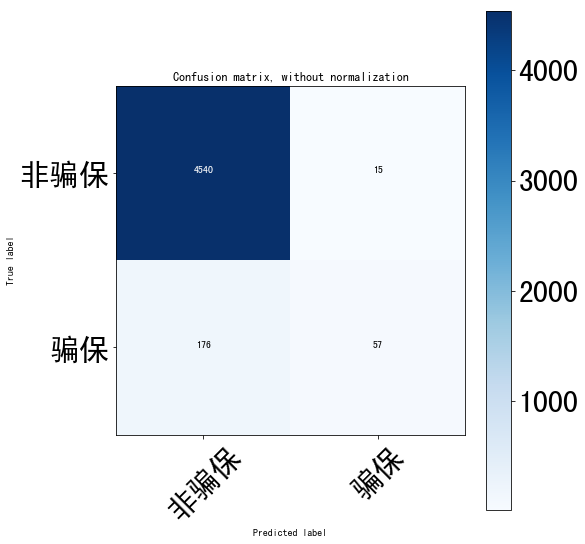

In [112]:
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=['非骗保','骗保'],
                      title='Confusion matrix, without normalization')


In [113]:
a = []
for i,j in enumerate(clf.feature_importances_):
    print(X_train.columns.tolist()[i],'---->',j)
    a.append([X_train.columns.tolist()[i],j])

药品费发生金额 ----> 0.0405563287543
贵重药品发生金额 ----> 0.0172644355758
中成药费发生金额 ----> 0.0241478989387
中草药费发生金额 ----> 0.0130924361455
药品费自费金额 ----> 0.020980509389
药品费申报金额 ----> 0.0308738898843
检查费发生金额 ----> 0.0158146526956
检查费申报金额 ----> 0.0183636544815
治疗费发生金额 ----> 0.0223548768938
治疗费申报金额 ----> 0.0218339061142
医用材料发生金额 ----> 0.0245670925184
其它发生金额 ----> 0.00836266222683
一次性医用材料申报金额 ----> 0.00431831963248
起付标准以上自负比例金额 ----> 0.0314769268961
基本医疗保险统筹基金支付金额 ----> 0.0494488858047
可用账户报销金额 ----> 0.0258349665178
基本医疗保险个人账户支付金额 ----> 0.0158345939223
非账户支付金额 ----> 0.0409908935725
本次审批金额 ----> 0.0442790210181
特殊金额 ----> 0.0177582265875
三目空值 ----> 0.0478825974444
普通门诊 ----> 0.0106074728714
糖尿病门诊 ----> 0.0131710013948
其他门诊 ----> 9.57814495715e-05
乙肝 ----> 0.000550404239082
肝素钙 ----> 0.00285365107952
脑心通胶囊 ----> 0.0054058239361
通心络胶囊 ----> 0.00715173648296
其他胶囊 ----> 0.00616397435654
三目其他 ----> 0.0112673711323
三目项目总价 ----> 0.0573785453509
三目统计项目总计和 ----> 0.00756100077435
挂号次数和 ----> 0.00392334791539
空值次数和 --

In [125]:
# 特征和重要型
a = pd.DataFrame(a,columns=['特征','重要性'])
fet_ipt = a.sort_values("重要性",ascending=False)  #按照特征重要性排序
new_fet_col = fet_ipt["特征"][:40]

In [126]:
fet_ipt.reset_index(drop=True)

,特征,重要性
0,三目项目总价,0.057379
1,基本医疗保险统筹基金支付金额,0.049449
2,三目空值,0.047883
3,本次审批金额,0.044279
4,非账户支付金额,0.040991
5,药品费发生金额,0.040556
6,医院个数,0.035957
7,交易间隔平均值,0.035382
8,交易次数,0.032275
9,起付标准以上自负比例金额,0.031477


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text xticklabel objects>)

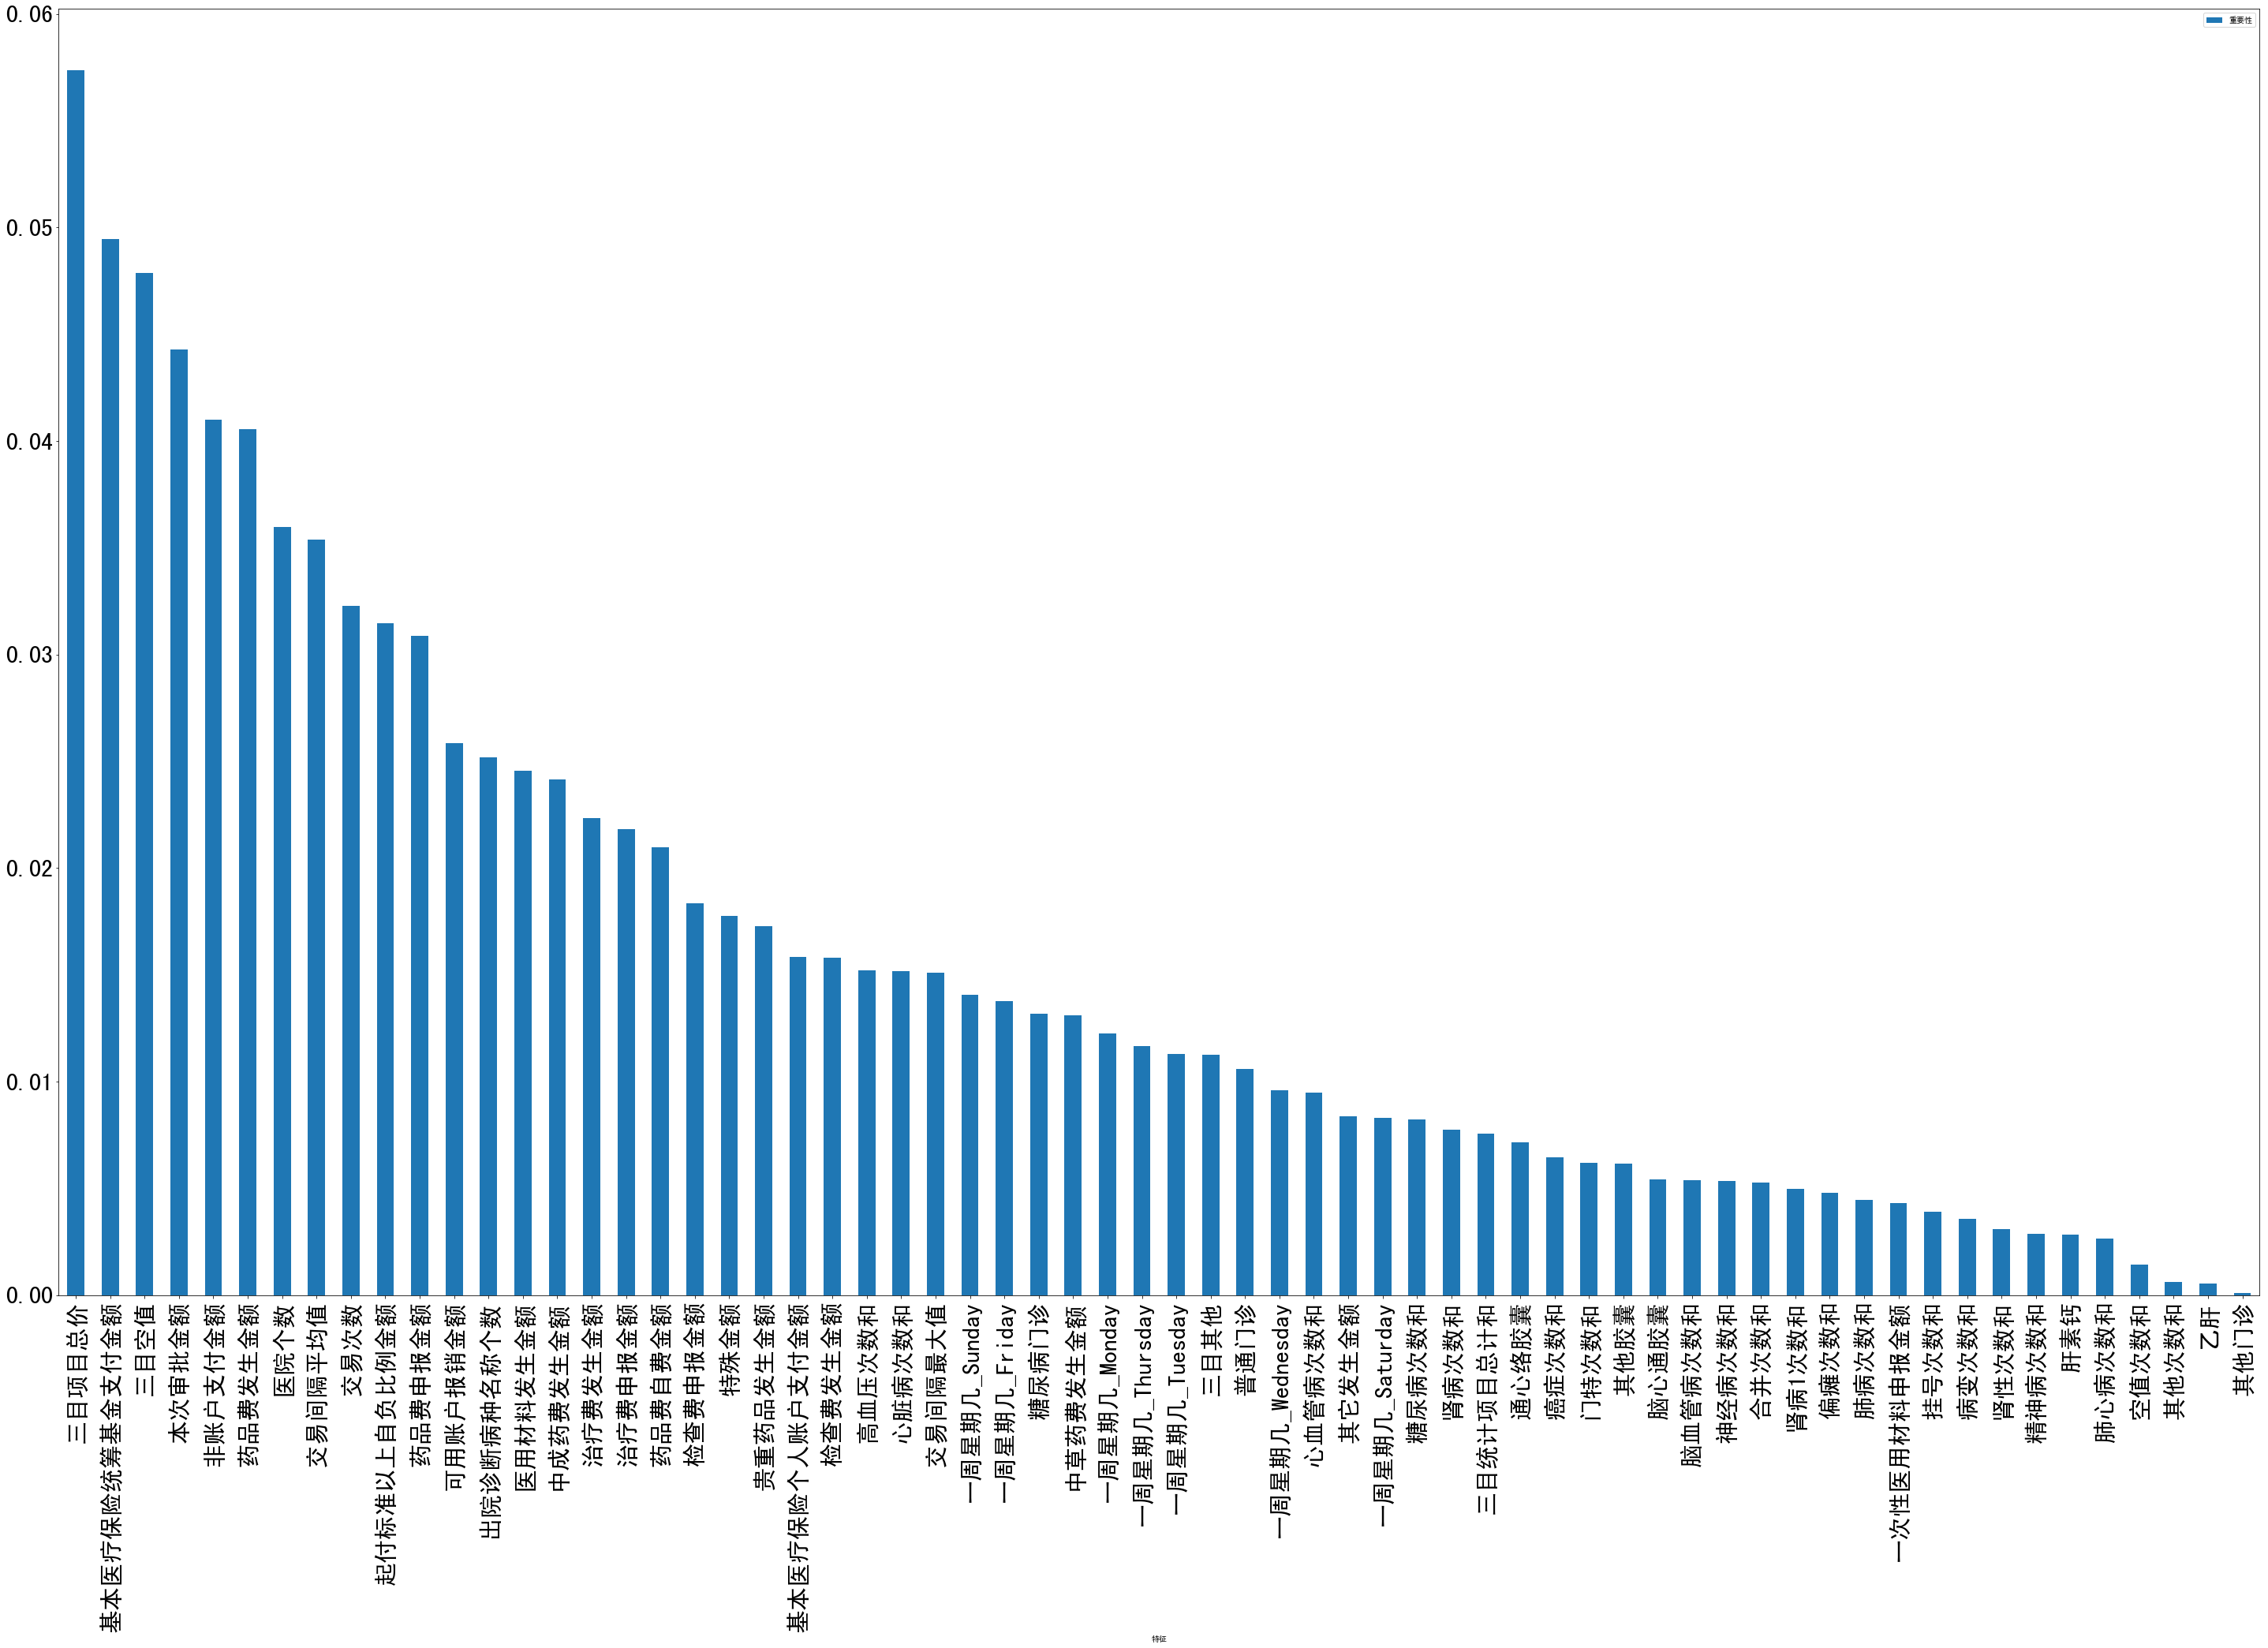

In [127]:
fig,ax = plt.subplots(figsize = (50,30))
a.set_index('特征').sort_values('重要性',ascending=False).plot(kind = 'bar',ax=ax)
plt.xticks(rotation=90)

# 网格搜索调优

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

# 利用新的特征去训练并且调优

In [129]:
new_X_train = X_train[new_fet_col]
new_X_test = X_test[new_fet_col]

pipeline = Pipeline([('clf', RandomForestClassifier())])
parameters = {
'clf__n_estimators': (100,150,175,180,200,220),
'clf__max_depth': (10,15,17,20,25,30),
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3,scoring='f1')

In [130]:
grid_search.fit(new_X_train, y_train)
#grid_search.fit(X_train, y_train)
print(' 最佳效果:%0.3f' % grid_search.best_score_)
print(' 最优参数组合:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(' \t %s: %r' % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  3.9min finished


 最佳效果:0.361
 最优参数组合:
 	 clf__max_depth: 30
 	 clf__n_estimators: 180


In [131]:
predictions = grid_search.predict(new_X_test)
print(' 准确率:', accuracy_score(y_test, predictions))
print(' 混淆矩阵:', confusion_matrix(y_test, predictions))
print(' 分类报告:\t')
print(classification_report(y_test, predictions))

 准确率: 0.961988304094
 混淆矩阵: [[4546    9]
 [ 173   60]]
 分类报告:	
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4555
          1       0.87      0.26      0.40       233

avg / total       0.96      0.96      0.95      4788



# 固化随机森林的模型

In [39]:
joblib.dump(grid_search, "/home/zhh/文档/阿里巴巴/data/8.模型训练/0811随机森林.m")

['/home/zhh/文档/阿里巴巴/data/8.模型训练/0811随机森林.m']

In [102]:
grid_search= joblib.load("/home/zhh/文档/阿里巴巴/data/8.模型训练/0811随机森林.m")

 # 尝试xgboost算法

In [1]:
import xgboost as xgb

/home/zhh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [66]:
#xgb矩阵赋值
# 读取训练集
train = pd.read_pickle("/home/zhh/文档/阿里巴巴/data/6.合表/训练集总表v3.pickle")
train = train.drop(['上中下旬'],axis=1)
fee_md = train["一次性医用材料申报金额"].median()
train["一次性医用材料申报金额"].fillna(fee_md,inplace=True)
train.drop('个人编码',axis=1,inplace=True)


test = pd.read_pickle("/home/zhh/文档/阿里巴巴/data/7测试表合表/测试集总表v3.pickle")
fee_md1 = test["一次性医用材料申报金额"].median()
test["一次性医用材料申报金额"].fillna(fee_md1,inplace=True)
test_person_id =test['个人编码']
test.drop('个人编码',axis=1,inplace=True)

In [68]:
train_xy,val = train_test_split(train, test_size = 0.3,random_state=1)
y = train_xy.标签
X = train_xy.drop(['标签'],axis=1)

val_y = val.标签
val_X = val.drop(['标签'],axis=1)

In [70]:
#xgb矩阵赋值
xgb_val = xgb.DMatrix(val_X,label=val_y)
xgb_train = xgb.DMatrix(X, label=y)
xgb_test = xgb.DMatrix(test)

In [95]:
#************************训练模型***************************************
params={
'num_class':2, # 类别数，与 multisoftmax 并用
'gamma':0.1,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
'max_depth':12, # 构建树的深度，越大越容易过拟合
'lambda':2,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
'subsample':0.7, # 随机采样训练样本
'colsample_bytree':0.7, # 生成树时进行的列采样
'min_child_weight':3, 
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
'eta': 0.007, # 如同学习率
'seed':1000,
'nthread':7,# cpu 线程数
#'eval_metric': 'auc'
}
plst = list(params.items())
num_rounds = 5000 # 迭代次数
watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]


In [97]:
model = xgb.train(plst, xgb_train, num_rounds, watchlist,early_stopping_rounds=100)
model.save_model('/home/zhh/文档/阿里巴巴/data/8.模型训练/xgboostv1.model') # 用于存储训练出的模型


[0]	train-merror:0.035088	val-merror:0.043024
Multiple eval metrics have been passed: 'val-merror' will be used for early stopping.

Will train until val-merror hasn't improved in 100 rounds.
[1]	train-merror:0.035267	val-merror:0.0401
[2]	train-merror:0.035267	val-merror:0.041353
[3]	train-merror:0.034998	val-merror:0.041562
[4]	train-merror:0.03473	val-merror:0.040936
[5]	train-merror:0.03473	val-merror:0.040727
[6]	train-merror:0.034819	val-merror:0.0401
[7]	train-merror:0.03464	val-merror:0.040309
[8]	train-merror:0.034551	val-merror:0.040309
[9]	train-merror:0.035177	val-merror:0.040727
[10]	train-merror:0.035625	val-merror:0.040518
[11]	train-merror:0.035356	val-merror:0.040518
[12]	train-merror:0.034819	val-merror:0.040518
[13]	train-merror:0.035177	val-merror:0.040727
[14]	train-merror:0.034998	val-merror:0.040518
[15]	train-merror:0.035177	val-merror:0.040309
[16]	train-merror:0.034998	val-merror:0.040727
[17]	train-merror:0.034819	val-merror:0.040518
[18]	train-merror:0.03481

In [98]:
#预测交叉值
preds = model.predict(xgb_val,ntree_limit=model.best_ntree_limit)

In [99]:
val_true = np.array(val_y)

In [100]:
#分类器报告
print(' 混淆矩阵:', confusion_matrix(val_true, preds))
print(' 分类报告:\t')
print(classification_report(val_true, preds))

 混淆矩阵: [[4544    8]
 [ 183   53]]
 分类报告:	
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4552
          1       0.87      0.22      0.36       236

avg / total       0.96      0.96      0.95      4788



# 读取测试集

In [158]:
test = pd.read_pickle("/home/zhh/文档/阿里巴巴/data/7测试表合表/测试集总表v3.pickle")

In [159]:
test= test.drop(['上中下旬'],axis=1)
test["一次性医用材料申报金额"]=test.fillna(test["一次性医用材料申报金额"].median())
test_data = test[new_fet_col]

In [160]:
new_X_train.columns.tolist() == test_data.columns.tolist()

True

In [161]:
test_predict = grid_search.predict(test_data)

In [162]:
result = pd.concat([test['个人编码'],pd.Series(test_predict)],axis=1)
result.columns =['个人编码','标签']

In [163]:
test_id = pd.read_csv("/home/zhh/文档/阿里巴巴/data/df_id_test.csv",header=None)
test_id.columns = ['个人编码']

In [164]:
result_label =pd.merge(test_id,result,how='left')

In [165]:
result_label.to_csv('/home/zhh/文档/阿里巴巴/data/提交结果201708110154.csv',sep=','
                    ,header=None,index=None)

In [166]:
a = pd.read_csv('/home/zhh/文档/阿里巴巴/data/提交结果201708110154.csv')